<a href="https://colab.research.google.com/github/newguy7/DataScienceProjects/blob/main/Predict_House_Prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
#load the dataset
train_df = pd.read_csv("train.csv")

In [ ]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
print(f"The dataset has {train_df.shape[0]} rows and {train_df.shape[1]} columns.")

The dataset has 1460 rows and 81 columns.


In [ ]:
print(round(train_df.isna().sum()/train_df.shape[0] * 100,2))

Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
                 ...  
MoSold            0.00
YrSold            0.00
SaleType          0.00
SaleCondition     0.00
SalePrice         0.00
Length: 81, dtype: float64


Dropping columns with over 20% NaN values

In [ ]:
clean_df = train_df.drop(columns=['Alley','MasVnrType','FireplaceQu','PoolQC','Fence','MiscFeature'],axis=1)

In [ ]:
clean_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [ ]:
clean_df.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 75, dtype: int64

In [ ]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [ ]:
# fill the nan values
from sklearn.impute import SimpleImputer
import numpy as np

# fill the rows with NA value
num_mean = SimpleImputer(missing_values=np.nan, strategy='mean')

# For Numerical Columns
num_col = clean_df.loc[:,clean_df.dtypes!=object].columns
num_mean.fit(clean_df[num_col])

clean_df[num_col] = num_mean.transform(clean_df[num_col])

In [ ]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   float64
 1   MSSubClass     1460 non-null   float64
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   float64
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   float64
 17  OverallCond    1460 non-null   float64
 18  YearBuil

In [ ]:
# fill the rows with NA value
obj_mean = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

# For String Columns
obj_col = clean_df.loc[:,clean_df.dtypes==object].columns
obj_mean.fit(clean_df[obj_col])

clean_df[obj_col] = obj_mean.transform(clean_df[obj_col])

In [ ]:
clean_df.isna().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 75, dtype: int64

In [ ]:
clean_df['YrSold'].value_counts()

YrSold
2009.0    338
2007.0    329
2006.0    314
2008.0    304
2010.0    175
Name: count, dtype: int64

In [ ]:
# Convert YrSold,MoSold,GarageYrBlt to int
clean_df['YrSold'] = clean_df['YrSold'].astype('int')
clean_df['MoSold'] = clean_df['MoSold'].astype('int')
clean_df['GarageYrBlt'] = clean_df['GarageYrBlt'].astype('int')

In [ ]:
MoSold = clean_df['MoSold'].value_counts().sort_index()
YrSold = clean_df['YrSold'].value_counts().sort_index()

In [ ]:
len(YrSold)

5

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

def add_labls(x,y):
  for k in range(len(x)):
    plt.text(x[k],y[k],str(y[k]),ha='center',va='bottom')

In [ ]:
YrSold.index

Index([2006, 2007, 2008, 2009, 2010], dtype='int64', name='YrSold')

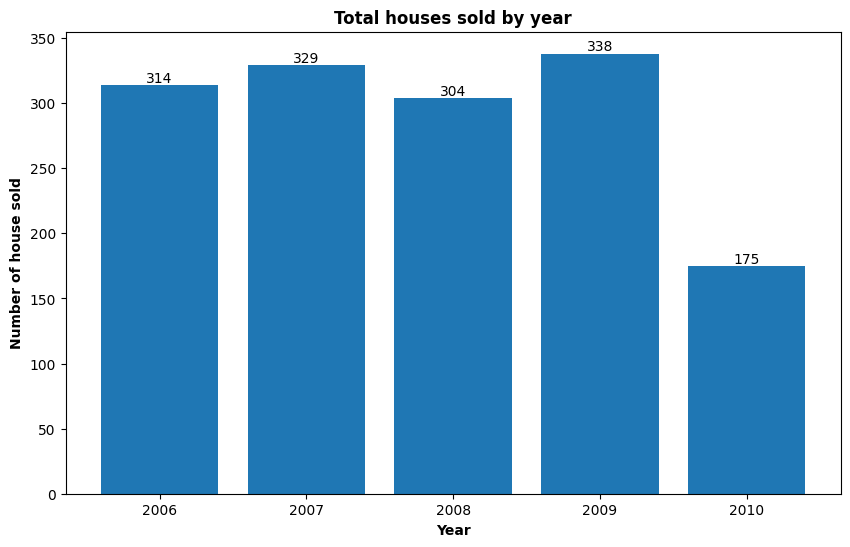

In [ ]:
# Total houses sold by year
plt.figure(figsize=(10,6))

plt.bar(YrSold.index,YrSold.values)
add_labls(YrSold.index,YrSold.values)
plt.xlabel('Year',weight='bold')
plt.ylabel('Number of house sold',weight='bold')
plt.title('Total houses sold by year',weight='bold')

plt.show()

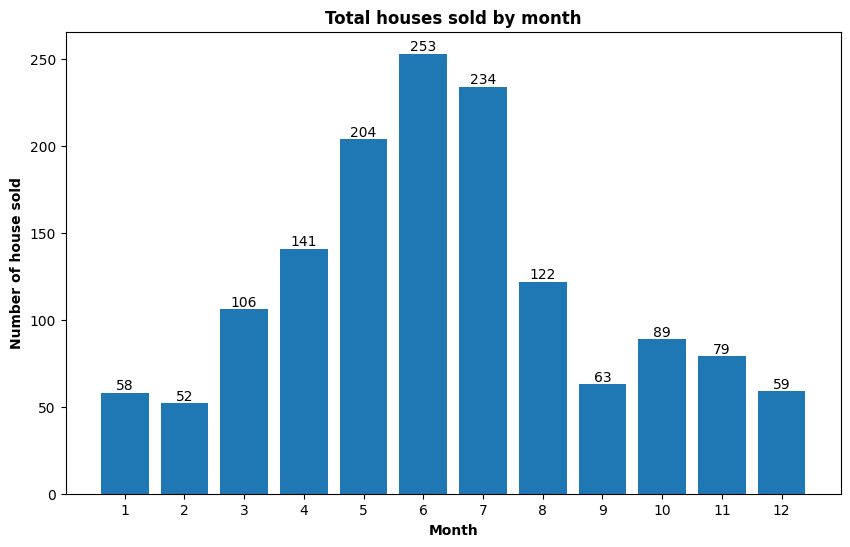

In [ ]:
#Total houses sold by month
plt.figure(figsize=(10,6),dpi=100)

plt.bar(MoSold.index,MoSold.values)
add_labls(MoSold.index,MoSold.values)
plt.xlabel('Month',weight='bold')
plt.ylabel('Number of house sold',weight='bold')
plt.title('Total houses sold by month',weight='bold')
plt.xticks(MoSold.index)

plt.show()

In [ ]:
# Type of road access to property
road_type = clean_df['Street'].value_counts().sort_index()

In [ ]:
print(road_type)

Street
Grvl       6
Pave    1454
Name: count, dtype: int64


In [ ]:
# Top 10 sales by Remodeled Year
clean_df['YearRemodAdd'] = clean_df['YearRemodAdd'].astype('int')
remodeled_year = clean_df['YearRemodAdd'].value_counts().sort_values(ascending=False)
remodeled_year = remodeled_year[:10].sort_index()


In [ ]:
# Top 10 sales by Remodeled Year
df = pd.DataFrame(remodeled_year,index=remodeled_year.index)
df

,count
YearRemodAdd,
1950,178
1996,36
2000,55
2002,48
2003,51
2004,62
2005,73
2006,97
2007,76


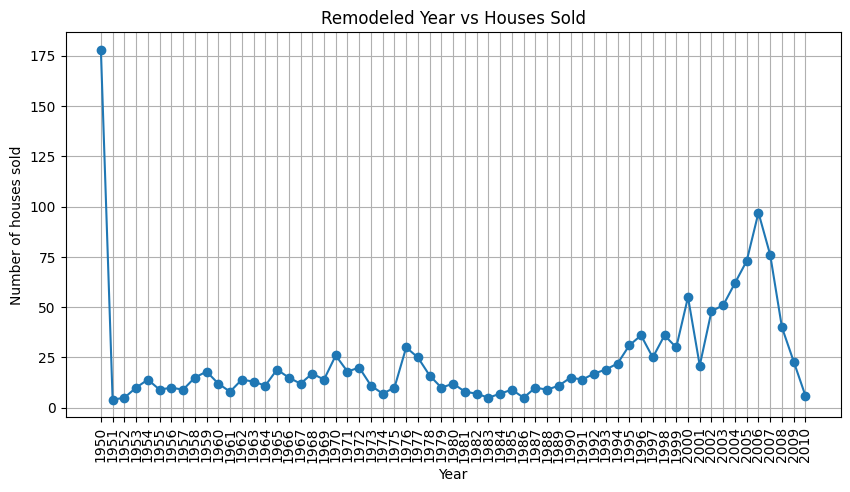

In [ ]:
# Houses sold by Year Remodeled

clean_df['YearRemodAdd'] = clean_df['YearRemodAdd'].astype('int')
remodeled_year = clean_df['YearRemodAdd'].value_counts().sort_index()

x = list(remodeled_year.index)
y = list(remodeled_year.values)

plt.figure(figsize=(10, 5))
plt.plot(x, y, marker='o')
plt.xticks(x,rotation=90)
plt.xlabel('Year')
plt.ylabel('Number of houses sold')
plt.title('Remodeled Year vs Houses Sold')
plt.grid(True)
plt.show()

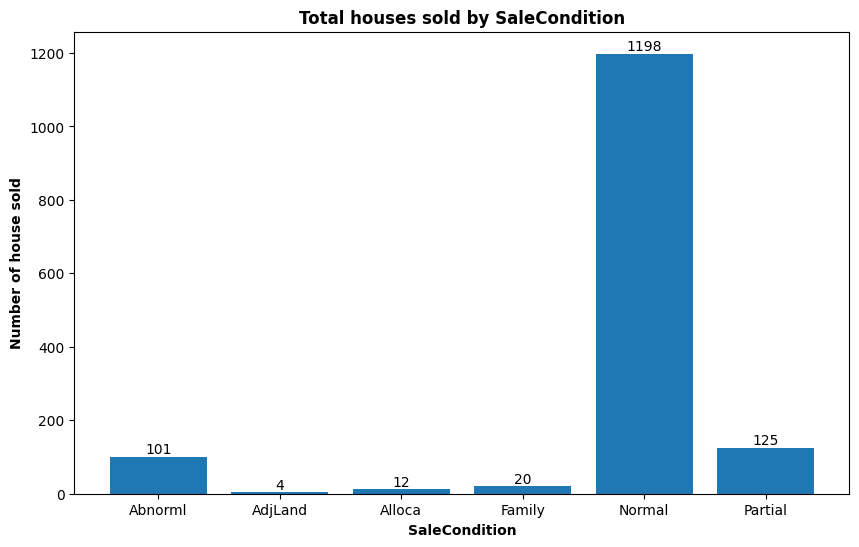

In [ ]:
#Total houses sold by SaleCondition
sale_condition = clean_df['SaleCondition'].value_counts().sort_index()

plt.figure(figsize=(10,6),dpi=100)

plt.bar(sale_condition.index,sale_condition.values)
add_labls(sale_condition.index,sale_condition.values)
plt.xlabel('SaleCondition',weight='bold')
plt.ylabel('Number of house sold',weight='bold')
plt.title('Total houses sold by SaleCondition',weight='bold')
plt.xticks(sale_condition.index)

plt.show()

In [ ]:
clean_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'Enclo

In [ ]:
clean_df = clean_df.drop(['Id'],axis=1)

In [ ]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   float64
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   float64
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   float64
 16  OverallCond    1460 non-null   float64
 17  YearBuilt      1460 non-null   float64
 18  YearRemo

<ipython-input-31-b2bc94327db8>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


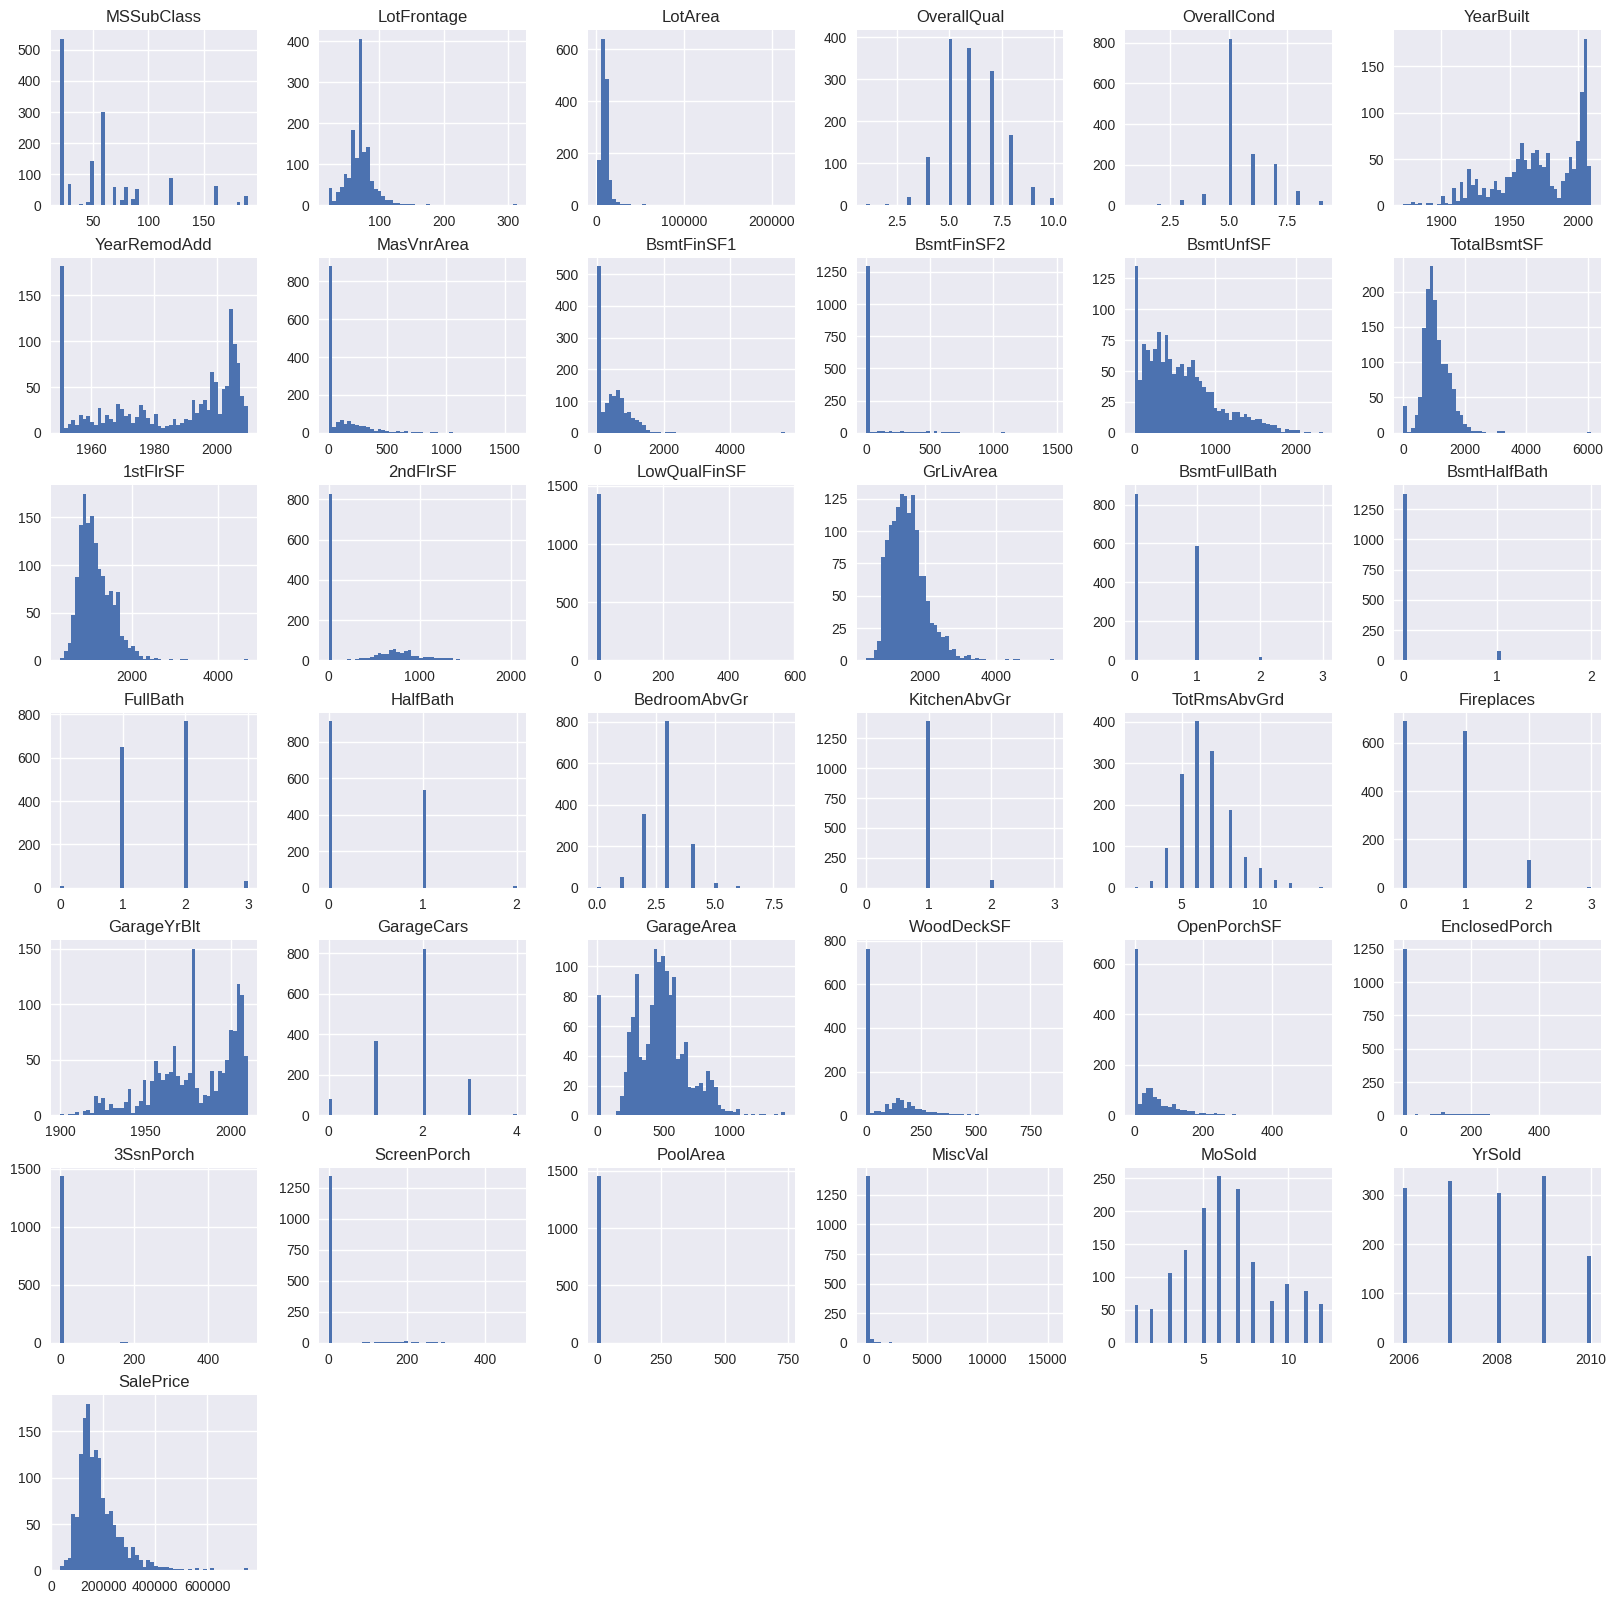

In [ ]:
# Density Plot for all features
plt.style.use('seaborn')
clean_df.hist(bins=50,figsize=(20,20))
plt.show()


In [ ]:
# check the correlation between all the features
clean_df.loc[:,clean_df.dtypes!=object].corr()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.357056,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022895,-0.069836,-0.065649,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.357056,1.000000,0.306795,0.234196,-0.052820,0.117598,0.082746,0.179283,0.215828,0.043340,...,0.077106,0.137454,0.009790,0.062335,0.037684,0.180868,0.001168,0.010158,0.006768,0.334901
LotArea,-0.139781,0.306795,1.000000,0.105806,-0.005636,0.014228,0.013788,0.103960,0.214103,0.111170,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,0.032628,0.234196,0.105806,1.000000,-0.091932,0.572323,0.550684,0.410238,0.239666,-0.059119,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,-0.059316,-0.052820,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.127788,-0.046231,0.040229,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,0.027850,0.117598,0.014228,0.572323,-0.375983,1.000000,0.592855,0.314745,0.249503,-0.049107,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,0.040581,0.082746,0.013788,0.550684,0.073741,0.592855,1.000000,0.179186,0.128451,-0.067759,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,0.022895,0.179283,0.103960,0.410238,-0.127788,0.314745,0.179186,1.000000,0.263582,-0.072302,...,0.159349,0.124965,-0.109849,0.018795,0.061453,0.011723,-0.029815,-0.005940,-0.008184,0.475241
BsmtFinSF1,-0.069836,0.215828,0.214103,0.239666,-0.046231,0.249503,0.128451,0.263582,1.000000,-0.050117,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420
BsmtFinSF2,-0.065649,0.043340,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.072302,-0.050117,1.000000,...,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.031706,-0.011378


In [ ]:
# drop monthsold and year sold
clean_df = clean_df.drop(['MoSold','YrSold'],axis=1)

In [ ]:
def correlation(dataset,threshold):
  col_corr = set()
  corr_matrix = dataset.corr()
  for i in range(len(corr_matrix.columns)):
    for j in range(i):
      if abs(corr_matrix.iloc[i,j]) > threshold:
        colname = corr_matrix.columns[i]
        col_corr.add(colname)
  return col_corr

In [ ]:
# Independent and Dependent features
X = clean_df.drop('SalePrice',axis=1)
y = clean_df['SalePrice']

In [ ]:
#One Hot Encoding for categorical features

cat_cols = X.loc[:,X.dtypes==object].columns
cat_cols

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [ ]:
X[cat_cols]

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1456,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,...,SBrkr,TA,Min1,Attchd,Unf,TA,TA,Y,WD,Normal
1457,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1458,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,...,FuseA,Gd,Typ,Attchd,Unf,TA,TA,Y,WD,Normal


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

In [ ]:
# One hot encoding for categorical features
categorical_features = X[cat_cols].values
# Create instance of OneHotEncoder
ENCODER = OneHotEncoder()
ENCODER.fit(categorical_features)
#print(ENCODER.categories_)
encoded_categorical_features = ENCODER.transform(categorical_features).toarray()

In [ ]:
encoded_categorical_features

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [ ]:
num_cols = X.loc[:,X.dtypes!=object].columns
num_features = X[num_cols].values

# bringing the numerical datas to normal range
scaler = StandardScaler()
scaler.fit(num_features)

numerical_features = scaler.transform(num_features)

In [ ]:
numerical_features

array([[ 0.07337496, -0.22937175, -0.20714171, ..., -0.27020835,
        -0.06869175, -0.08768781],
       [-0.87256276,  0.4519361 , -0.09188637, ..., -0.27020835,
        -0.06869175, -0.08768781],
       [ 0.07337496, -0.09311018,  0.07347998, ..., -0.27020835,
        -0.06869175, -0.08768781],
       ...,
       [ 0.30985939, -0.18395123, -0.14781027, ..., -0.27020835,
        -0.06869175,  4.95311151],
       [-0.87256276, -0.09311018, -0.08016039, ..., -0.27020835,
        -0.06869175, -0.08768781],
       [-0.87256276,  0.22483348, -0.05811155, ..., -0.27020835,
        -0.06869175, -0.08768781]])

In [ ]:
# Concatenate both numerical features and encoded categorical features
X_features_data = np.concatenate([numerical_features,encoded_categorical_features],axis=1)

In [ ]:
X_features_data

array([[ 0.07337496, -0.22937175, -0.20714171, ...,  0.        ,
         1.        ,  0.        ],
       [-0.87256276,  0.4519361 , -0.09188637, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.07337496, -0.09311018,  0.07347998, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [ 0.30985939, -0.18395123, -0.14781027, ...,  0.        ,
         1.        ,  0.        ],
       [-0.87256276, -0.09311018, -0.08016039, ...,  0.        ,
         1.        ,  0.        ],
       [-0.87256276,  0.22483348, -0.05811155, ...,  0.        ,
         1.        ,  0.        ]])

In [ ]:
y

0       208500.0
1       181500.0
2       223500.0
3       140000.0
4       250000.0
          ...   
1455    175000.0
1456    210000.0
1457    266500.0
1458    142125.0
1459    147500.0
Name: SalePrice, Length: 1460, dtype: float64

In [ ]:
print(X_features_data.shape)
print(y.shape)

(1460, 264)
(1460,)


In [ ]:
# threshold = 0.80
correlation(X_features_data,0.80)

AttributeError: 'numpy.ndarray' object has no attribute 'corr'

In [ ]:
#Train Test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_features_data,y,test_size=0.25, random_state=42)

In [ ]:
X_train.shape, X_test.shape

((1095, 264), (365, 264))

In [ ]:
X_train.corr()

AttributeError: 'numpy.ndarray' object has no attribute 'corr'